In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:

batch_sz = 4


## Load Your Data :

In [3]:
## reading and storing data
IMG_WIDTH=256
IMG_HEIGHT=256
NO_CHANNELS=3

train_imgs = 'train'                   # path of the train images
train_labels = 'train_labels/'         # Path of the Labels Images ( Masks )

val_imgs = "val"
val_labels = "val_labels"

test = "test"
test_labels="test_labels"

xtrain_ids = os.listdir(os.path.join(train_imgs))          # to read the images ids
ytrain_ids =os.listdir(os.path.join(train_labels))

xval_ids = os.listdir(os.path.join(val_imgs))
yval_ids= os.listdir(os.path.join(val_labels))

test_ids = os.listdir(os.path.join(test))

X_train = np.zeros((len(xtrain_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32') ## Empty Numpy arrays
#print(X_train)
Y_train = np.zeros((len(ytrain_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32')

X_val = np.zeros((len(xval_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32')
Y_val = np.zeros((len(yval_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32')

xTest = np.zeros((len(test_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32')

In [4]:
X_train.shape

(369, 256, 256, 3)

In [5]:
print(len(xtrain_ids))
print(len(ytrain_ids))

369
369


In [6]:
print('Number of train frames: ' + str(len(os.listdir('train'))))
print('Number of train labels: ' + str(len(os.listdir('train_labels'))))
print('Number of val frames: ' + str(len(os.listdir('val'))))
print('Number of val labels: ' + str(len(os.listdir('val_labels'))))
print('Number of test frames: ' + str(len(os.listdir('test'))))
print('Number of test labels: ' + str(len(os.listdir('test_labels'))))
print('Total frames: ' + str(len(os.listdir('train')) + len(os.listdir('val')) + len(os.listdir('test'))))

Number of train frames: 369
Number of train labels: 369
Number of val frames: 100
Number of val labels: 100
Number of test frames: 232
Number of test labels: 232
Total frames: 701


## For Train :

In [7]:
def adjust_mask(mask, flat=False):
    
    semantic_map = []
    for colour in list(cls2rgb.values()):  # values bte3et el classes el fel dictionary
        
        equality = np.equal(mask, colour)          # 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)     # 256x256 If all True, then True, else False
        semantic_map.append(class_map) # List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)   # 256x256x32 True only at the found color, and all False otherwise.
    if flat:
        semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)# convert to numbers

## For Validation Data :

In [8]:
import pandas as pd
classes = pd.read_csv('class_dict.csv', index_col =0)

classes



,r,g,b
name,,,
Animal,64,128,64
Archway,192,0,128
Bicyclist,0,128,192
Bridge,0,128,64
Building,128,0,0
Car,64,0,128
CartLuggagePram,64,0,192
Child,192,128,64
Column_Pole,192,192,128


In [9]:
n_classes= len(classes)
print(n_classes)

32


To access the colors, we can index the dataframe with its row index name using the .loc operation.  

we do that 3lshan nst5dem el Class color da , w n apply it 3la el Picture , 3lshan n3rf kol pixel fel picture belongs to ay class 

In [10]:
cls2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index}

In [11]:
cls2rgb

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column_Pole': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc_Text': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'SUVPickupTruck': [64, 128, 192],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck_Bus': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

## Now let's visualize and explore some samples:

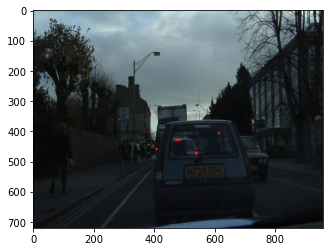

In [12]:
from keras.preprocessing import image     
import cv2
import matplotlib.pyplot as plt


img = image.load_img("train/0001TP_009210.png")
plt.imshow(img)

## Let's have a look on the masks (the ground truth)  ( Labels ) 

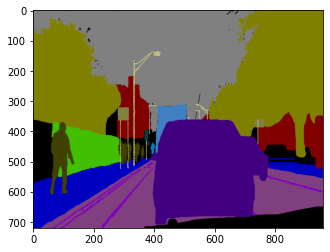

In [13]:
mask  = image.load_img("train_labels/0001TP_009210_L.png")
plt.imshow(mask)

3lshan nshof el shape, lazem ne7wellha numpy 

In [14]:
import numpy as np
mask = np.array(mask)# Now colors are the same as in the dict, since keras load_img uses RGB order.
mask.shape

(720, 960, 3)

 AdjustMask  function : bet3addi 3la kol el pixels el fel mask , w tshof el R G B beta3 el pixel fe kol mask , w ted5ol fel dictionary da , w tshof kol pixel ana gebtaha  r g b bet3ha kam w tekarenha bel dictionary , w hat3ml 1 hot encoded vector , lw el pixel shabh class mo3yn , hatdelo 1 w el ba2i zeros .

 Also to Convert the Masks ( Labels ) from 3 channels , to 32 channels 

In [15]:
new_mask = adjust_mask(mask)

In [16]:
new_mask.shape

(720, 960, 32)

## me7tag eni a7wel el yTrain , yVal 

## Apply el kalam da 3la kol el Masks    + 3lshan arg3 tani l 3 colors 

In [17]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(cls2rgb.items())}
idx2rgb

{0: array([ 64, 128,  64]),
 1: array([192,   0, 128]),
 2: array([  0, 128, 192]),
 3: array([  0, 128,  64]),
 4: array([128,   0,   0]),
 5: array([ 64,   0, 128]),
 6: array([ 64,   0, 192]),
 7: array([192, 128,  64]),
 8: array([192, 192, 128]),
 9: array([ 64,  64, 128]),
 10: array([128,   0, 192]),
 11: array([192,   0,  64]),
 12: array([128, 128,  64]),
 13: array([192,   0, 192]),
 14: array([128,  64,  64]),
 15: array([ 64, 192, 128]),
 16: array([64, 64,  0]),
 17: array([128,  64, 128]),
 18: array([128, 128, 192]),
 19: array([  0,   0, 192]),
 20: array([192, 128, 128]),
 21: array([128, 128, 128]),
 22: array([ 64, 128, 192]),
 23: array([ 0,  0, 64]),
 24: array([ 0, 64, 64]),
 25: array([192,  64, 128]),
 26: array([128, 128,   0]),
 27: array([192, 128, 192]),
 28: array([64,  0, 64]),
 29: array([192, 192,   0]),
 30: array([0, 0, 0]),
 31: array([ 64, 192,   0])}

## To Convert the mask Back   from 32 channels  to 3 channels only like the original  

In [18]:
# Map the idx back to rgb          # Hena  3lsh 
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))  

## -1 means 3adad el masks kolha 

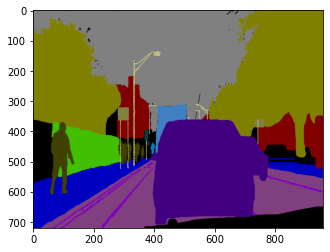

In [19]:
plt.imshow(rgb_mask)

 ## ---$$$- Build The Model ---###-  UNet   

In [20]:
import numpy as np 
import os
from tensorflow.keras.applications import MobileNetV2
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
IMAGE_SIZE =256

def mob_unet_model():
    inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name="input_image")
    
    encoder = MobileNetV2(input_tensor=inputs, weights="imagenet", include_top=False, alpha=0.35)
    skip_connection_names = ["input_image", "block_1_expand_relu", "block_3_expand_relu", "block_6_expand_relu"]
    encoder_output = encoder.get_layer("block_13_expand_relu").output
    
    f = [16, 32, 48, 64]
    x = encoder_output
    for i in range(1, len(skip_connection_names)+1, 1):
        x_skip = encoder.get_layer(skip_connection_names[-i]).output
        x = UpSampling2D((2, 2))(x)
        x = Concatenate()([x, x_skip])
        
        x = Conv2D(f[-i], (3, 3), padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        
        x = Conv2D(f[-i], (3, 3), padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        
    x = Conv2D(n_classes, (1, 1), padding="same")(x)
    x = Activation("softmax")(x)
    
    model = Model(inputs, x)
    return model

In [21]:
model = mob_unet_model()
model.compile(optimizer =tf.keras.optimizers.Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 16  432         ['input_image[0][0]']            
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 16  64          ['Conv1[0][0]']                  
                                )                                                             

C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
from keras.preprocessing.image import load_img
def load_raw_CAMVID(data_type='train', enc='ohe', shape='normal'):
    img_path = data_type + '/'
    labels_path = data_type + '_labels/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
    x = np.array([np.array(load_img(str(img_path) + file, target_size=(IMAGE_SIZE,IMAGE_SIZE)))*1./255 for file in sorted(os.listdir(img_path))])
    if(enc=='ohe'):
    
        y = np.array([np.array(load_img(str(labels_path) + file, target_size=(IMAGE_SIZE,IMAGE_SIZE))) for file in sorted(os.listdir(labels_path))])
    elif(enc=='sparse_cat'):
        y = np.array([np.array(load_img(str(labels_path) + file, target_size=(256,256))) for file in sorted(os.listdir(labels_path))])
    if(shape == 'flat'):
        y = np.reshape(y.shape[0], y.shape[1]*y.shape[2])
        y = np.expand_dims(y, axis=-1)
    return x, y

## Notee : we did do the adjust Mask Here on ( y ) because we will do it in the Generator function 

In [23]:
import time
start = time.time()
X_train, Y_train = load_raw_CAMVID(data_type='train')           # load camvid returns x , y  , x for xTrain , y for yTrain
#x_test, y_test = load_CAMVID(data_type='test')# Don't load test for RAM consumption
X_val, Y_val = load_raw_CAMVID(data_type='val')
end = time.time()
print('Time elapsed: ', end-start)


Time elapsed:  10.671731948852539


In [24]:
print(X_train.shape)
print(Y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(369, 256, 256, 3)
(369, 256, 256, 3)
(100, 256, 256, 3)
(100, 256, 256, 3)


In [25]:
# Data generator
batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #rescale=1./255)# Data is already scaled when loaded

mask_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #preprocessing_function=adjust_mask)# This is not possible since the preprocessing_function can only return the same shape as image

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow(
    X_train,
    seed=seed,
    batch_size=batch_sz)

mask_generator = mask_datagen.flow( 
    Y_train,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)



In [26]:

def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  
        
val_image_generator = image_datagen.flow(
    X_val,
    seed=seed,
    batch_size=batch_sz)

val_mask_generator = mask_datagen.flow(
    Y_val,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)        
        
def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  


In [27]:

batch_sz = 4


In [28]:
from keras.callbacks import ReduceLROnPlateau ,EarlyStopping ,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss", 
    patience = 50,
    verbose = 1, 
    factor = 0.5, 
    min_lr = 0.000000001
)

early_stopping = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    verbose = 1,
    mode = "max",
)

checkpoint = ModelCheckpoint(
    monitor = "val_loss",
    filepath = "Camvid_200_Epochs.hdf5",
    verbose = 1,
    save_best_only = True, 
    save_weights_only = True
)
callbacks= [reduce_lr,checkpoint]

In [29]:
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=len(X_train)//batch_sz,
                    validation_steps=len(X_val)//batch_sz,
                    epochs=200,
                    callbacks=callbacks)

<ipython-input-29-0e8a4cb0fea8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator_fn(),


Epoch 1/200
92/92 [==============================] - ETA: 0s - loss: 2.7680 - accuracy: 0.2523
Epoch 00001: val_loss improved from inf to 2.97732, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 37s 328ms/step - loss: 2.7680 - accuracy: 0.2523 - val_loss: 2.9773 - val_accuracy: 0.2505 - lr: 1.0000e-04
Epoch 2/200
92/92 [==============================] - ETA: 0s - loss: 2.2168 - accuracy: 0.6049
Epoch 00002: val_loss improved from 2.97732 to 2.41268, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 31s 324ms/step - loss: 2.2168 - accuracy: 0.6049 - val_loss: 2.4127 - val_accuracy: 0.6252 - lr: 1.0000e-04
Epoch 3/200
92/92 [==============================] - ETA: 0s - loss: 2.0038 - accuracy: 0.7229
Epoch 00003: val_loss improved from 2.41268 to 2.20724, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 30s 323ms/step - loss: 2.0038 - accuracy: 0.7229 - val_loss: 2.2072 - val_accuracy: 0.6340 - lr

Epoch 26/200
92/92 [==============================] - ETA: 0s - loss: 0.6353 - accuracy: 0.7850
Epoch 00026: val_loss improved from 0.74129 to 0.71501, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 30s 324ms/step - loss: 0.6353 - accuracy: 0.7850 - val_loss: 0.7150 - val_accuracy: 0.7635 - lr: 1.0000e-04
Epoch 27/200
92/92 [==============================] - ETA: 0s - loss: 0.6173 - accuracy: 0.7896
Epoch 00027: val_loss improved from 0.71501 to 0.68315, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 30s 326ms/step - loss: 0.6173 - accuracy: 0.7896 - val_loss: 0.6832 - val_accuracy: 0.7728 - lr: 1.0000e-04
Epoch 28/200
92/92 [==============================] - ETA: 0s - loss: 0.6167 - accuracy: 0.7862
Epoch 00028: val_loss did not improve from 0.68315
92/92 [==============================] - 29s 320ms/step - loss: 0.6167 - accuracy: 0.7862 - val_loss: 0.7490 - val_accuracy: 0.7560 - lr: 1.0000e-04
Epoch 29/200
92/92 [====

92/92 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.8229
Epoch 00052: val_loss improved from 0.50150 to 0.49777, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 28s 311ms/step - loss: 0.4469 - accuracy: 0.8229 - val_loss: 0.4978 - val_accuracy: 0.8126 - lr: 1.0000e-04
Epoch 53/200
92/92 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.8228
Epoch 00053: val_loss did not improve from 0.49777
92/92 [==============================] - 28s 308ms/step - loss: 0.4485 - accuracy: 0.8228 - val_loss: 0.5254 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 54/200
92/92 [==============================] - ETA: 0s - loss: 0.4552 - accuracy: 0.8208
Epoch 00054: val_loss did not improve from 0.49777
92/92 [==============================] - 28s 308ms/step - loss: 0.4552 - accuracy: 0.8208 - val_loss: 0.5013 - val_accuracy: 0.8094 - lr: 1.0000e-04
Epoch 55/200
92/92 [==============================] - ETA: 0s - loss: 0.4472 - ac

Epoch 79/200
92/92 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.8344
Epoch 00079: val_loss did not improve from 0.45642
92/92 [==============================] - 29s 314ms/step - loss: 0.4037 - accuracy: 0.8344 - val_loss: 0.4751 - val_accuracy: 0.8187 - lr: 1.0000e-04
Epoch 80/200
92/92 [==============================] - ETA: 0s - loss: 0.4063 - accuracy: 0.8331
Epoch 00080: val_loss improved from 0.45642 to 0.43866, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 29s 317ms/step - loss: 0.4063 - accuracy: 0.8331 - val_loss: 0.4387 - val_accuracy: 0.8233 - lr: 1.0000e-04
Epoch 81/200
92/92 [==============================] - ETA: 0s - loss: 0.3936 - accuracy: 0.8386
Epoch 00081: val_loss did not improve from 0.43866
92/92 [==============================] - 29s 313ms/step - loss: 0.3936 - accuracy: 0.8386 - val_loss: 0.4780 - val_accuracy: 0.8147 - lr: 1.0000e-04
Epoch 82/200
92/92 [==============================] - ETA: 0s - loss

92/92 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.8395
Epoch 00106: val_loss did not improve from 0.43425
92/92 [==============================] - 29s 316ms/step - loss: 0.3875 - accuracy: 0.8395 - val_loss: 0.4515 - val_accuracy: 0.8239 - lr: 1.0000e-04
Epoch 107/200
92/92 [==============================] - ETA: 0s - loss: 0.3796 - accuracy: 0.8405
Epoch 00107: val_loss did not improve from 0.43425
92/92 [==============================] - 29s 314ms/step - loss: 0.3796 - accuracy: 0.8405 - val_loss: 0.4665 - val_accuracy: 0.8180 - lr: 1.0000e-04
Epoch 108/200
92/92 [==============================] - ETA: 0s - loss: 0.3773 - accuracy: 0.8428
Epoch 00108: val_loss improved from 0.43425 to 0.42906, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 29s 319ms/step - loss: 0.3773 - accuracy: 0.8428 - val_loss: 0.4291 - val_accuracy: 0.8273 - lr: 1.0000e-04
Epoch 109/200
92/92 [==============================] - ETA: 0s - loss: 0.3730 -

Epoch 134/200
92/92 [==============================] - ETA: 0s - loss: 0.3700 - accuracy: 0.8463
Epoch 00134: val_loss did not improve from 0.42906
92/92 [==============================] - 29s 313ms/step - loss: 0.3700 - accuracy: 0.8463 - val_loss: 0.4332 - val_accuracy: 0.8259 - lr: 1.0000e-04
Epoch 135/200
92/92 [==============================] - ETA: 0s - loss: 0.3845 - accuracy: 0.8404
Epoch 00135: val_loss did not improve from 0.42906
92/92 [==============================] - 29s 314ms/step - loss: 0.3845 - accuracy: 0.8404 - val_loss: 0.4687 - val_accuracy: 0.8209 - lr: 1.0000e-04
Epoch 136/200
92/92 [==============================] - ETA: 0s - loss: 0.3717 - accuracy: 0.8443
Epoch 00136: val_loss did not improve from 0.42906
92/92 [==============================] - 29s 314ms/step - loss: 0.3717 - accuracy: 0.8443 - val_loss: 0.4681 - val_accuracy: 0.8171 - lr: 1.0000e-04
Epoch 137/200
92/92 [==============================] - ETA: 0s - loss: 0.3755 - accuracy: 0.8412
Epoch 00137:

92/92 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.8417
Epoch 00161: val_loss improved from 0.42906 to 0.41577, saving model to Camvid_200_Epochs.hdf5
92/92 [==============================] - 29s 317ms/step - loss: 0.3811 - accuracy: 0.8417 - val_loss: 0.4158 - val_accuracy: 0.8347 - lr: 5.0000e-05
Epoch 162/200
92/92 [==============================] - ETA: 0s - loss: 0.3666 - accuracy: 0.8469
Epoch 00162: val_loss did not improve from 0.41577
92/92 [==============================] - 29s 317ms/step - loss: 0.3666 - accuracy: 0.8469 - val_loss: 0.4585 - val_accuracy: 0.8214 - lr: 5.0000e-05
Epoch 163/200
92/92 [==============================] - ETA: 0s - loss: 0.3685 - accuracy: 0.8455
Epoch 00163: val_loss did not improve from 0.41577
92/92 [==============================] - 29s 314ms/step - loss: 0.3685 - accuracy: 0.8455 - val_loss: 0.4443 - val_accuracy: 0.8269 - lr: 5.0000e-05
Epoch 164/200
92/92 [==============================] - ETA: 0s - loss: 0.3787 -

Epoch 189/200
92/92 [==============================] - ETA: 0s - loss: 0.3685 - accuracy: 0.8454
Epoch 00189: val_loss did not improve from 0.41577
92/92 [==============================] - 29s 313ms/step - loss: 0.3685 - accuracy: 0.8454 - val_loss: 0.4412 - val_accuracy: 0.8242 - lr: 5.0000e-05
Epoch 190/200
92/92 [==============================] - ETA: 0s - loss: 0.3650 - accuracy: 0.8465
Epoch 00190: val_loss did not improve from 0.41577
92/92 [==============================] - 29s 314ms/step - loss: 0.3650 - accuracy: 0.8465 - val_loss: 0.4463 - val_accuracy: 0.8242 - lr: 5.0000e-05
Epoch 191/200
92/92 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.8455
Epoch 00191: val_loss did not improve from 0.41577
92/92 [==============================] - 29s 314ms/step - loss: 0.3683 - accuracy: 0.8455 - val_loss: 0.4309 - val_accuracy: 0.8294 - lr: 5.0000e-05
Epoch 192/200
92/92 [==============================] - ETA: 0s - loss: 0.3668 - accuracy: 0.8458
Epoch 00192:

In [36]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
    plt.figure(1)
  
  # Img
    plt.subplot(311)
    plt.imshow(img)
  
  # Predict
    pred_mask = model.predict(np.expand_dims(img, 0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    if shape=='flat':
        pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
    rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
    plt.subplot(312)
    plt.imshow(rgb_mask)
              
  # GT mask
    if gt_mode == 'ohe':
        gt_img_ohe = np.argmax(gt_mask, axis=-1)
        gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
    plt.subplot(313)
    plt.imshow((gt_mask).astype(np.uint8))

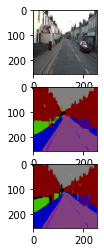

In [37]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')